# Evaluation analysis

We will be taking a look at the evaluations from the data folder ([notebook ](../data/evaluations.csv), [github](https://github.com/sidgek/msoppgave/tree/master/data/evaluations.csv)).

## Setup

Before looking at the data, a list of imports and the version of libraries used is reported.

In [1]:
# Built-in python libraries
import platform
from glob import glob
from itertools import chain

# 3rd-party libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IPython
from IPython.utils.coloransi import TermColors

# Print versions.
print('Python version: {}'.format(platform.python_version()))
print('IPython version: {}'.format(IPython.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('numpy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))


# Initialize the backend for Jupyter
%matplotlib notebook

# Set style-sheet to grayscale.
matplotlib.style.use('grayscale')
# Set figure font to serif.
plt.rcParams['font.family'] = 'serif'

# Set how many columns to show in tables.
pd.options.display.max_columns = 50
pd.options.display.max_rows = 400
# Set the format to print float values to 3 decimal points.
pd.options.display.float_format = lambda x: '%.3f' % x

Python version: 3.5.2+
IPython version: 5.1.0
matplotlib version: 1.5.3
numpy version: 1.11.3
pandas version: 0.19.2


# The data

First we load the CSV file into a [pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), print the amount of samples and take a look at the column headers of the dataset.

In [2]:
file = '../data/evaluations.csv'
evaluation_data = pd.read_csv(file, sep=',', header=0, index_col=0)

print('Amount of samples: {}'.format(len(evaluation_data.index)))

column_headers = evaluation_data.columns.values
print('\nColumn headers: {}'.format(column_headers))

Amount of samples: 400

Column headers: ['title' 'research_type' 'result_outcome' 'affiliation'
 'problem_description' 'goal/objective' 'research_method'
 'research_question' 'hypothesis' 'prediction' 'contribution' 'pseudocode'
 'open_source_code' 'open_experiment_code' 'train' 'validation' 'test'
 'results' 'hardware_specification' 'software_dependencies'
 'third_party_citation' 'experiment_setup' 'evaluation_criteria' 'authors'
 'link' 'comments' 'conference']


There are 400 samples with 27 columns in total for each sample. However, some columns are not necessary for further analysis: *title*, *authors*, *link*, *comments*. The *comments* column contains short messages such as *"Points to an extended paper"* or *"Links to appendix which links to code"* to give extra information in case an evaluation is unclear. The other three identify which paper was evaluated. These columns are therefore removed from the dataframe.

In [3]:
evaluation_data.drop(['title', 'link', 'authors', 'comments'], axis=1, inplace=True)
column_headers = evaluation_data.columns.values
print('\nColumn headers: {}'.format(column_headers))


Column headers: ['research_type' 'result_outcome' 'affiliation' 'problem_description'
 'goal/objective' 'research_method' 'research_question' 'hypothesis'
 'prediction' 'contribution' 'pseudocode' 'open_source_code'
 'open_experiment_code' 'train' 'validation' 'test' 'results'
 'hardware_specification' 'software_dependencies' 'third_party_citation'
 'experiment_setup' 'evaluation_criteria' 'conference']


The remaining 23 columns can be placed in more clarifying categories:

| Category | Description |
|---|---|
| *Miscellaneous* | Variables describing the research. |
| *Research Transparency* | How well documented is the research method? |
| *Experiment Documentation* | How well is the experiment documented? |
| *Method Documentation* | How well is the method under investigation documented? |
| *Open Data* | How well is the data documented, and is it available? |

And the columns relevant for each category. All data is boolean with the value 0 or 1, unless otherwise specified below.

**Miscellaneous**  
*research_type* - Experimental (E) or theoretical (T).  
*result_outcome* - Novel research or not.  
*affiliation* - The affiliation of the authors; academia (0), collaboration (1), industry (2).  
*conference* - The conference the paper was accepted to.  
*third_party_citation* - Is third-party source code or data referenced?

**Research Transparency**  
*problem_description* - The problem the research seeks to solve.  
*goal/objective* - The objective of the research.  
*research_method* - Research method used.  
*research_question* - Research question(s) asked.  
*hypothesis* - Investigated hypothesis.  
*prediction* - Predictions related to the hypothesis.  
*contribution* - Contribution of the research.  
*Note: The variables under Research Transparency are 1 if explicitly mentioned in the paper, otherwise 0.*

**Experiment Documentation**  
*open_experiment_code* - Is the experiment code available?  
*hardware_specification* - Hardware used.  
*software_dependencies* - For method or experiment.  
*experiment_setup* - Is the experiment setup described with parameters etc.?  
*evaluation_criteria* - Specification of evaluation criteria.

**Method Documentation**  
*pseudocode* - Method described in pseudocode.  
*open_source_code* - Is the method code available?

**Open Data**  
*train* - Training set specification.  
*validation* - Validation set specification.  
*test* - Test set specification.  
*results* - Raw results data.  
*Note: If no data is open sourced all will be 0. If data is open source but the sets are not specified train or test will be set to 1 depending on whether the research requires training or not. If the research does not require training, train and validation does not have a value set.*

In [4]:
category_headers = {
    'Miscellaneous': np.append(column_headers[0:3], column_headers[[19, 22]]),
    'Research Transparency': column_headers[3:10],
    'Method Documentation': column_headers[10:12],
    'Open Data': column_headers[13:17],
    'Experiment Documentation': column_headers[[12, 17, 18, 20, 21]]
}

A look at the first two samples of the dataset show the difference between experimental and theoretical papers.

In [5]:
evaluation_data.head(2)

,research_type,result_outcome,affiliation,problem_description,goal/objective,research_method,research_question,hypothesis,prediction,contribution,pseudocode,open_source_code,open_experiment_code,train,validation,test,results,hardware_specification,software_dependencies,third_party_citation,experiment_setup,evaluation_criteria,conference
index,,,,,,,,,,,,,,,,,,,,,,,
1,E,1,0,1,0,0,0,0,0,1,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,IJCAI 16
2,T,1,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,IJCAI 16


The first sample is an experimental paper (**research_type**=E) and has values set for all the columns.
The second paper, however, is a theoretical paper (**research_type**=T) and only has values set for the *Miscellaneous*, and *Research Transparency* categories, excluding the *third_part_citation* column.

Cells with missing values are represented as `NaN` in pandas and can be seen for all the columns exclusive to experimental papers in the second sample above. For experimental papers where training is not relevant, both the *train* and *validation* columns will show as `NaN`.

We can utilise pandas' DataFrame.describe() to get a summary of the numerical columns.

In [6]:
evaluation_data.describe()

,result_outcome,affiliation,problem_description,goal/objective,research_method,research_question,hypothesis,prediction,contribution,pseudocode,open_source_code,open_experiment_code,train,validation,test,results,hardware_specification,software_dependencies,third_party_citation,experiment_setup,evaluation_criteria
count,400.000,400.000,400.000,400.000,400.000,400.000,400.000,400.000,400.000,325.000,325.000,325.000,185.000,182.000,325.000,325.000,325.000,325.000,325.000,325.000,325.000
mean,0.943,0.200,0.465,0.203,0.013,0.050,0.043,0.010,0.468,0.545,0.080,0.055,0.562,0.165,0.298,0.037,0.274,0.160,0.532,0.686,0.471
std,0.233,0.464,0.499,0.402,0.111,0.218,0.202,0.100,0.500,0.499,0.272,0.229,0.497,0.372,0.458,0.189,0.447,0.367,0.500,0.465,0.500
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000
75%,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000
max,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


The count row show that 325 of the 400 samples were found to be experimental papers, leaving 75 theoretical papers.

A glance at the row of mean values indicate that most of the columns low values, meaning the documentation of those columns is rather low in the sampled papers.

## Categories
In this part each category will be examined more closely, and we first begin with the miscellaneous variables.

### Miscellaneous
First lets get a summary of the summary of the different columns.

In [7]:
miscellaneous_data = evaluation_data[category_headers['Miscellaneous']]
def size_by_groupby(data_frame):
    for column in data_frame.columns.values:
        print(data_frame.groupby(column).size(), end='\n\n')

size_by_groupby(miscellaneous_data)

research_type
E    325
T     75
dtype: int64

result_outcome
0     23
1    377
dtype: int64

affiliation
0    331
1     58
2     11
dtype: int64

third_party_citation
0.000    152
1.000    173
dtype: int64

conference
AAAI 14     100
AAAI 16     100
IJCAI 13    100
IJCAI 16    100
dtype: int64



In [8]:
print(miscellaneous_data.groupby(['conference']).size())

conference
AAAI 14     100
AAAI 16     100
IJCAI 13    100
IJCAI 16    100
dtype: int64


In [9]:
miscellaneous_data.groupby(['research_type']).describe()

affiliation  result_outcome  third_party_citation
research_type                                                         
E             count      325.000         325.000               325.000
              mean         0.215           0.966                 0.532
              std          0.481           0.181                 0.500
              min          0.000           0.000                 0.000
              25%          0.000           1.000                 0.000
              50%          0.000           1.000                 1.000
              75%          0.000           1.000                 1.000
              max          2.000           1.000                 1.000
T             count       75.000          75.000                 0.000
              mean         0.133           0.840                   nan
              std          0.380           0.369                   nan
              min          0.000           0.000                   nan
              25%          0.000           1.000                   nan
              50%          0.000           1.000                   nan
              75%          0.000           1.000                   nan
              max          2.000           1.000                   nan

<IPython.core.display.Javascript object>


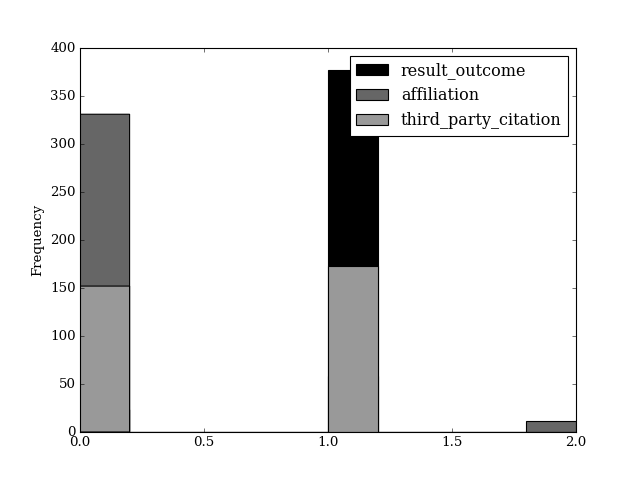

In [10]:
evaluation_data[category_headers['Miscellaneous']].plot(kind='hist')